In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import svgpathtools as svg
from IPython.core.display import display, HTML, display_html

In [2]:
def dft(s):
    N = len(s)
    k = np.arange(N)
    kT = np.atleast_2d(k).T
    W = np.exp(-2j*np.pi*k*kT/N) / N
    
    return W @ s

def epicycles(coeffs, N):
    """
    Matrix of epicycle summands
    Rows: time index
    Columns: epicycle order
    """
    n = np.arange(len(coeffs))
    kT = np.atleast_2d(np.arange(N)).T
    Wi = np.exp(2j*np.pi*n*kT/N)
    
    return Wi @ np.diag(coeffs)

In [3]:
paths, _ = svg.svg2paths('python_logo_one_path.svg')
path = paths[0]

In [6]:
N = 300
ts = np.linspace(0, 1, num=N)
ps = np.conj(np.array([path.point(t) for t in ts]))

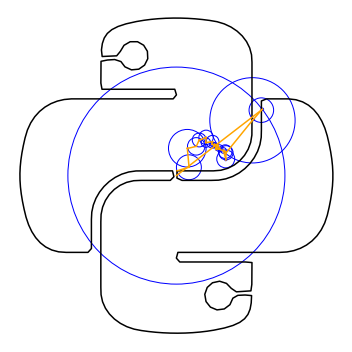

In [8]:
coeffs = dft(ps)
circle_matrix = epicycles(coeffs, N)
circle_matrix[:, 0] = 0  # set constant offset to 0

fig, ax = plt.subplots(figsize=(5, 5))

path_xdata = []
path_ydata = []
path_line, = plt.plot(path_xdata, path_ydata, color='black')

vectors = []
circles = []
for n in range(len(coeffs)):
    v, = plt.plot([0, 0], [1, 1], color='orange')
    vectors.append(v)
    
    c = Circle((0, 0), radius=1, color='blue', fill=False)
    ax.add_patch(c)
    circles.append(c)    

def init():
    ax.set_xlim(-60, 60)
    ax.set_ylim(-60, 60)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.tight_layout()
    return [path_line, *vectors, *circles]

def update(k):
    new_point = sum(circle_matrix[k, :])
    path_xdata.append(np.real(new_point))
    path_ydata.append(np.imag(new_point))
    path_line.set_data(path_xdata, path_ydata)
    
    p = 0
    
    for n, v_line in enumerate(vectors):
        v = circle_matrix[k, n]
        v_line.set_xdata([np.real(p), np.real(p+v)])
        v_line.set_ydata([np.imag(p), np.imag(p+v)])
        
        c = circles[n]
        c.set_center((np.real(p), np.imag(p)))
        c.set_radius(np.abs(v))
        
        p += v
    
    return [path_line, *vectors, *circles]

ani = FuncAnimation(fig, update, frames=np.arange(N),
                    init_func=init, blit=True, interval=int(1000/30))
ani.save('python_anim.mp4', dpi=200)
#display(HTML(ani.to_jshtml()))